In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pyclustertend import vat, ivat, hopkins, assess_tendency_by_mean_metric_score, assess_tendency_by_metric
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:>

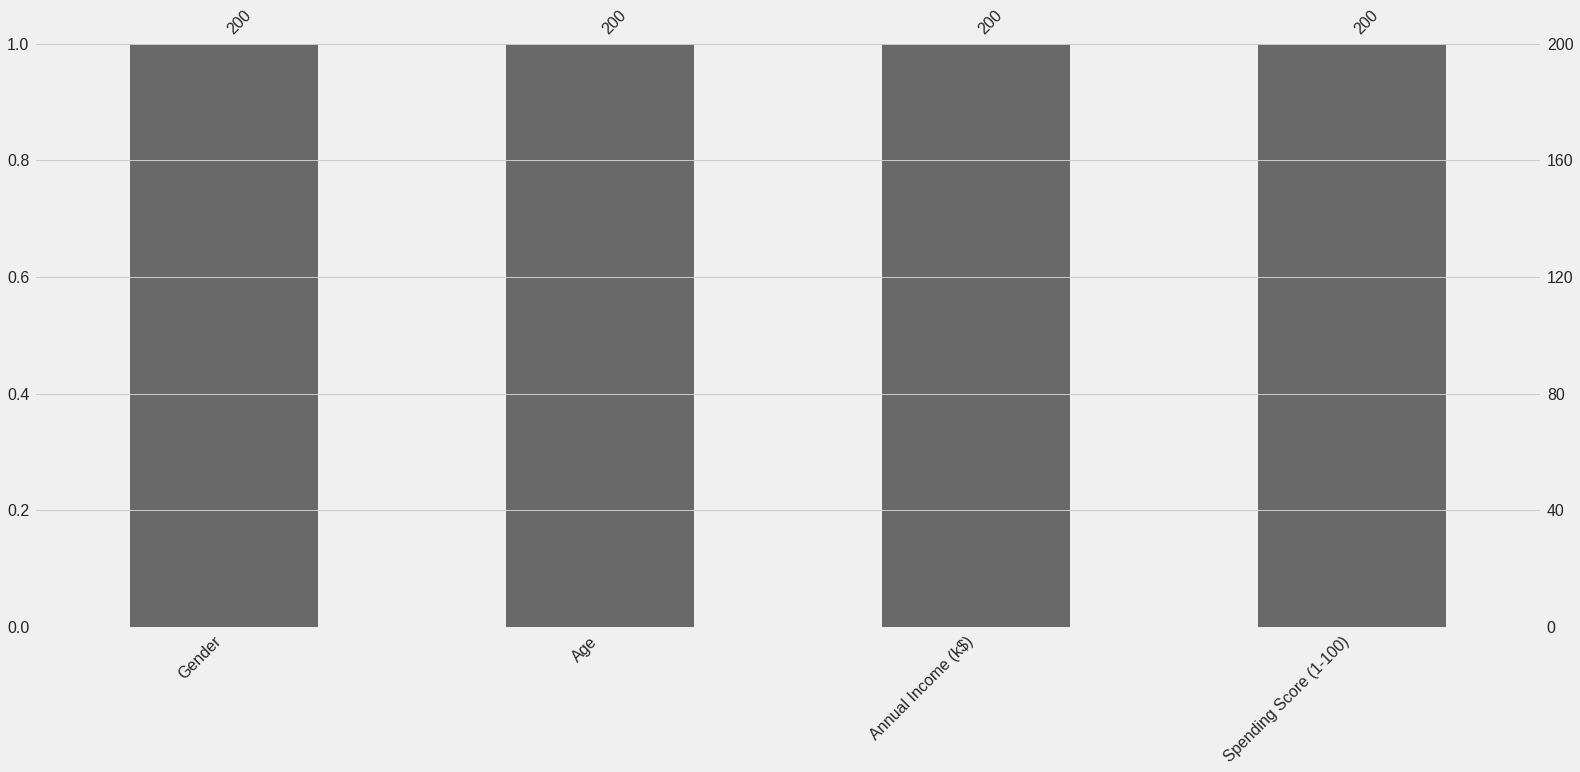

In [12]:
msno.bar(df)
# Eğer datamızda missing value olsaydı onun yerini gösterecekti.

In [10]:
df.drop("CustomerID", axis=1, inplace=True)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


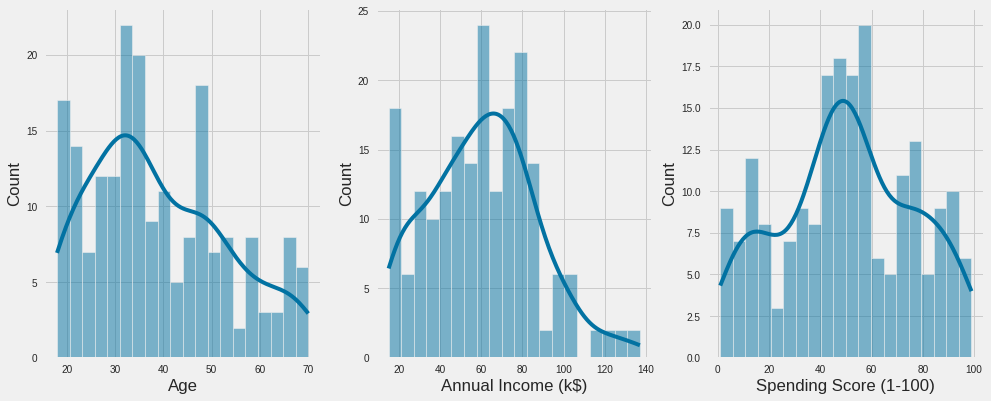

In [13]:
ig, ax = plt.subplots(1, 3, figsize=(15, 6))
n = 0
for column in df.select_dtypes(np.number).columns:
    sns.histplot(df[column], bins=20, ax=ax[n], kde=True)
    n += 1
plt.show()

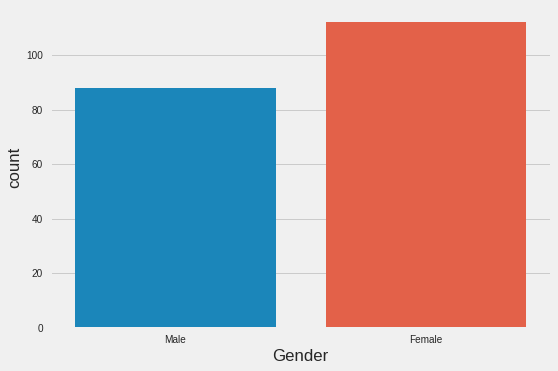

In [15]:
sns.countplot(x="Gender", data=df);

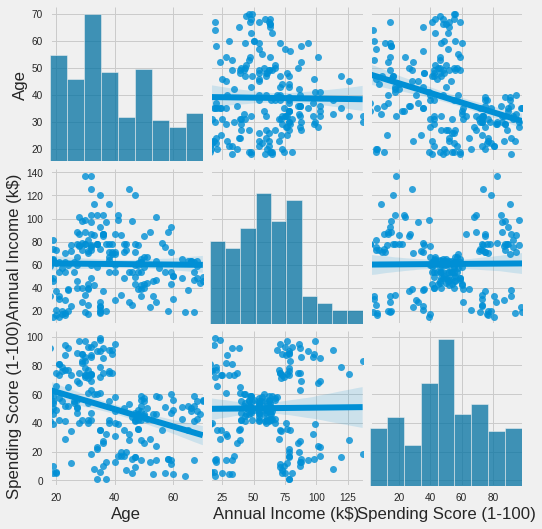

In [18]:
sns.pairplot(df, kind="reg");

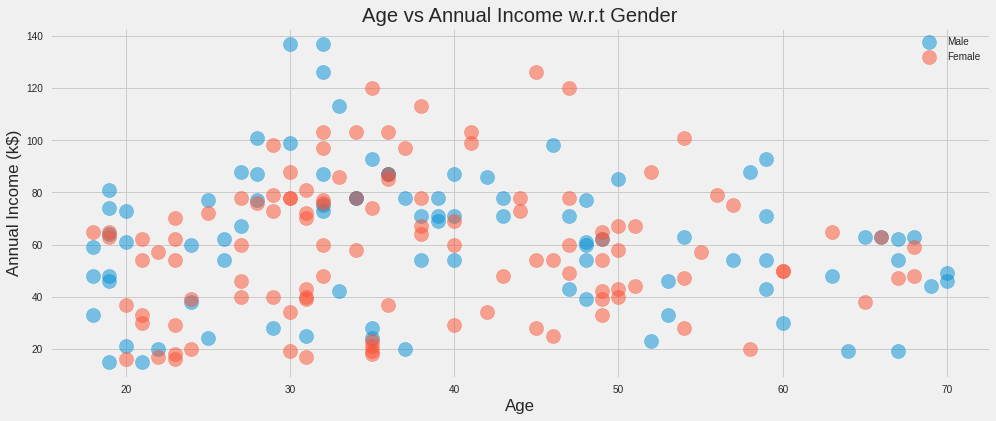

In [19]:
plt.figure(1 , figsize = (15 , 6))
for gender in df.Gender.unique():
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

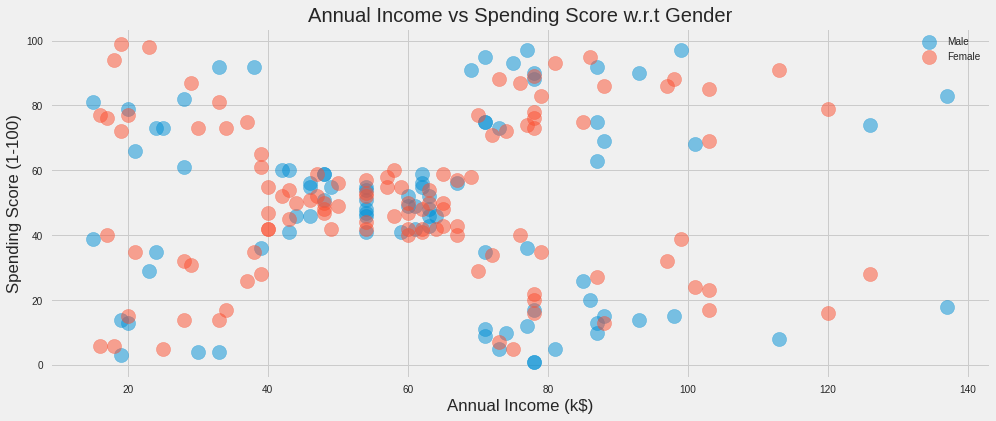

In [20]:
plt.figure(1 , figsize = (15 , 6))
for gender in df.Gender.unique():
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

In [24]:
df.shape

(200, 4)

In [21]:
hopkins(df[["Annual Income (k$)", "Spending Score (1-100)"]],200)
# 200 data uzunluğu

0.3126884686921076

In [25]:
scaler = MinMaxScaler()

In [26]:
hopkins(scaler.fit_transform(pd.get_dummies(df, drop_first=True)), 200)
# hopkins test sonucumuz her zaman farklı çıkabilir. Çünkü bu işlem her zaman random olarak seçilen datalar ile yapılıyor. 

0.20297752883250306

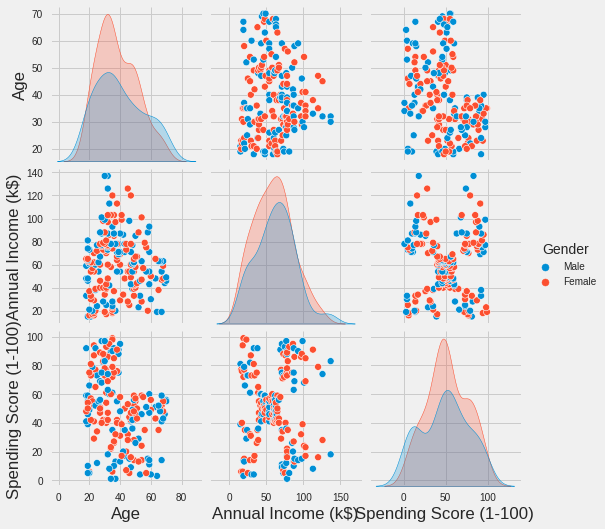

In [27]:
sns.pairplot(df, hue="Gender");

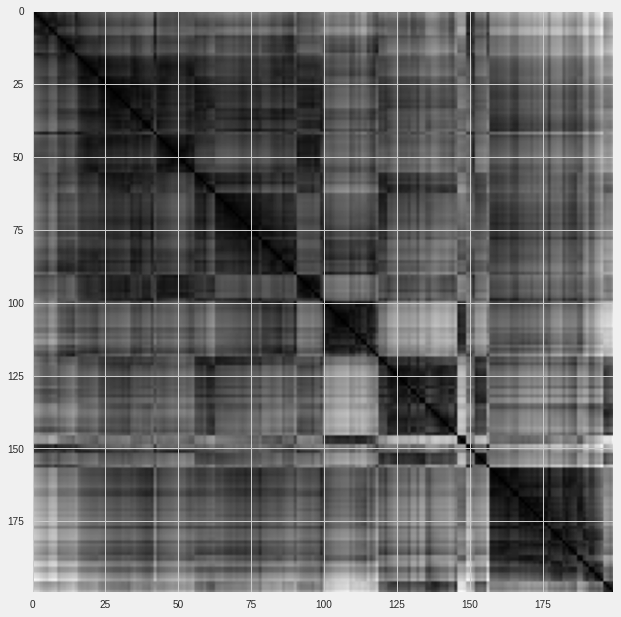

In [28]:
vat(pd.get_dummies(df))